# Perceptron Learning Rule

### Imports

In [2]:
# Necessities
import numpy as np
import matplotlib.pyplot as plt

# Dataset
import opendatasets as od

### Dataset explore

In [3]:
# Kaggle url for UCI banknote ID dataset
#data_url = "https://www.kaggle.com/ritesaluja/bank-note-authentication-uci-data"

# Download
#od.download(data_url)


Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: steveworswick
Your Kaggle Key: ········


100%|███████████████████████████████████████████████████████████████████████████| 19.2k/19.2k [00:00<00:00, 6.64MB/s]

### Network Functions

In [3]:
# Activation Functions

# Hardlim
def hardLim(X):
    return np.where(X < 0, 0, 1)

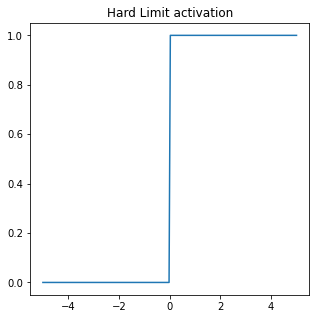

In [10]:
# visualise functions
x = np.linspace(start=-5, stop=5, num=200)

plt.figure(figsize = (5, 5))

y = hardLim(x)

plt.plot(x,y)
plt.gca().set_title("Hard Limit activation")
plt.show()

### Perceptron

In [ ]:
# Define perceptron
class perceptron